another

Enter a minimum happiness range: 4
Enter a maximum happiness range: 5

Number of countries within the range 4.0 to 5.0: 43

How many countries would you like to print (up to 43)? 10

Correlations with Happiness Score:

Indicator            Correlation
------------------------------
Gdp                  0.10      
Support              0.04      
Expectancy           0.16      
Freedom              0.11      
Generosity           -0.13     
Corruption           0.03      



Rank  Country                   Score      GDP        Support         Expectancy      Freedom    Generosity   Corruption  
----------------------------------------------------------------------------------------------------------------------------------
1     Ghana                     4.996      0.611      0.868           0.486           0.381     0.245        0.040       
2     Ivory Coast               4.944      0.569      0.808           0.232           0.352     0.154        0.090       
3     Nepal             

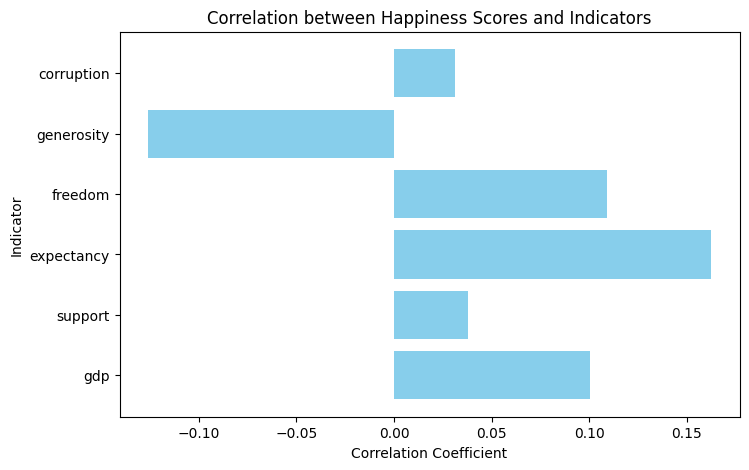

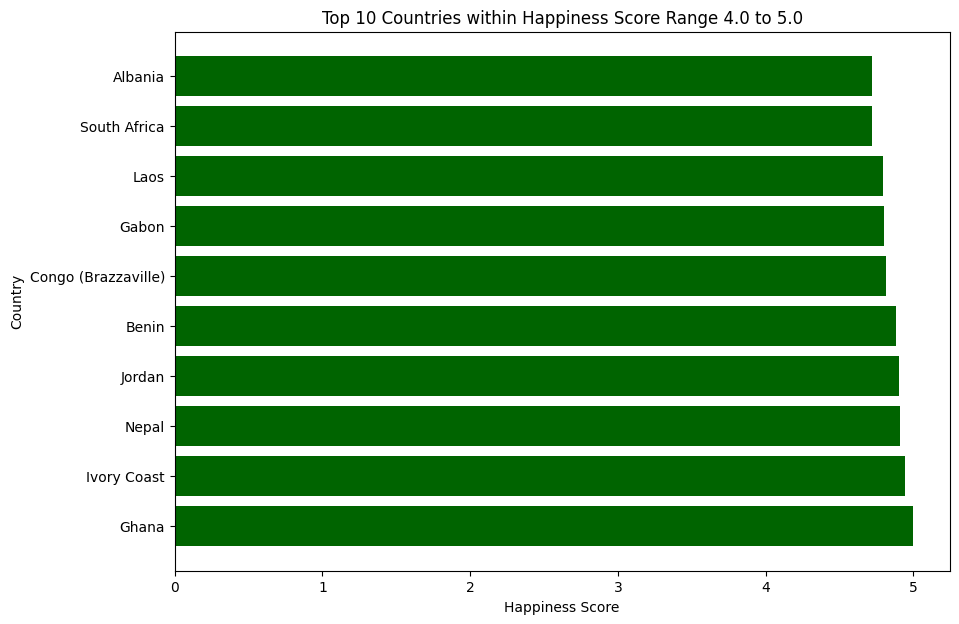

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np

class Country:
    def __init__(self, rank, name, score, gdp, support, expectancy, freedom, generosity, corruption):
        self.rank = rank
        self.name = name
        self.score = score
        self.gdp = gdp
        self.support = support
        self.expectancy = expectancy
        self.freedom = freedom
        self.generosity = generosity
        self.corruption = corruption

def read_data(file_path):
    data = []
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip header row
        for row in reader:
            data.append(Country(
                int(row[0]),  # rank
                row[1],       # name
                float(row[2]),  # score
                float(row[3]),  # gdp
                float(row[4]),  # support
                float(row[5]),  # expectancy
                float(row[6]),  # freedom
                float(row[7]),  # generosity
                float(row[8])   # corruption
            ))
    return data

def filter_by_score(data, min_score, max_score):
    return [country for country in data if min_score <= country.score <= max_score]

def calc_correlation(countries):
    scores = [country.score for country in countries]
    correlations = {}
    for key in ['gdp', 'support', 'expectancy', 'freedom', 'generosity', 'corruption']:
        values = [getattr(country, key) for country in countries]
        correlation = np.corrcoef(scores, values)[0, 1]
        correlations[key] = correlation
    return correlations

def quicksort(countries, descending=True):
    if len(countries) <= 1:
        return countries
    pivot = countries[len(countries) // 2]
    left = [x for x in countries if x.score > pivot.score]
    middle = [x for x in countries if x.score == pivot.score]
    right = [x for x in countries if x.score < pivot.score]
    sorted_list = quicksort(left, descending) + middle + quicksort(right, descending)
    return sorted_list if descending else sorted_list[::-1]

def print_countries(countries, num_to_print):
    print(f"\n{'Rank':<5} {'Country':<25} {'Score':<10} {'GDP':<10} {'Support':<15} {'Expectancy':<15} {'Freedom':<10} {'Generosity':<12} {'Corruption':<12}")
    print("-" * 130)
    for i, country in enumerate(countries[:num_to_print], start=1):
        print(f"{i:<5} {country.name:<25} {country.score:<10.3f} {country.gdp:<10.3f} {country.support:<15.3f} {country.expectancy:<15.3f} {country.freedom:<10.3f}{country.generosity:<12.3f} {country.corruption:<12.3f}")
    print("\n")
def print_correlations(correlations):
    print("\nCorrelations with Happiness Score:")
    print(f"\n{'Indicator':<20} {'Correlation':<10}")
    print("-" * 30)
    for key, value in correlations.items():
        print(f"{key.capitalize():<20} {value:<10.2f}")
    print("\n")

def visualize_correlations(correlations):
    indicators = list(correlations.keys())
    correlation_values = list(correlations.values())

    plt.figure(figsize=(8, 5))
    plt.barh(indicators, correlation_values, color='skyblue')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Indicator')
    plt.title('Correlation between Happiness Scores and Indicators')
    plt.show()
    print("\n")

def visualize_top_countries(countries, num_to_print, min_score, max_score):
    top_country_names = [country.name for country in countries[:num_to_print]][::-1]  # Reverse for highest to lowest display
    top_happiness_scores = [country.score for country in countries[:num_to_print]][::-1]  # Reverse for highest to lowest display

    plt.figure(figsize=(10, 7))
    plt.barh(top_country_names, top_happiness_scores, color='darkgreen')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.title(f'Top {num_to_print} Countries within Happiness Score Range {min_score} to {max_score}')
    plt.gca().invert_yaxis()
    plt.show()
    print("\n")

def main():
    file_path = '2019.csv'
    data = read_data(file_path)

    try:
        min_score = float(input("Enter a minimum happiness range: "))
        max_score = float(input("Enter a maximum happiness range: "))
    except ValueError:
        print("Please enter valid numeric values for the happiness range.")
        return

    filtered_countries = filter_by_score(data, min_score, max_score)
    num_countries = len(filtered_countries)
    print(f"\nNumber of countries within the range {min_score} to {max_score}: {num_countries}\n")
    try:
        num_to_print = int(input(f"How many countries would you like to print (up to {num_countries})? "))
    except ValueError:
        print("Please enter a valid integer for the number of countries to print.")
        return

    if num_to_print < 1 or num_to_print > num_countries:
        print(f"Please enter a number between 1 and {num_countries}.")
        return

    correlations = calc_correlation(filtered_countries)
    print_correlations(correlations)
    sorted_countries = quicksort(filtered_countries, descending=True)
    print_countries(sorted_countries, num_to_print)
    visualize_correlations(correlations)
    visualize_top_countries(sorted_countries, num_to_print, min_score, max_score)

if __name__ == "__main__":
    main()
